# **Visualisation et statistiques descriptives**
---

## Introduction<a class="anchor" id="partie1"></a>

Ce notebook contient les codes nécessaires à la visualisation et les statistiques descriptives de notre base de données.

## Sommaire

* [Introduction](#partie1)
* [Statistiques descriptives](#partie2)
    * [Visualisation et nettoyage des données manquantes](#partie21)
    * [Statistiques descriptives intra-pays](#partie22)
        * [Résumé statistique des variables](#partie221)
        * [Étude des corrélations](#partie222)
    * [Statistiques descriptives inter-pays](#partie23)
    * [Une première analyse exploratoire des séries temporelles](#partie24)
        * [Données du PIB](#partie241)
        * [Données des Working Hours](#partie242)
        * [Données des taux d'intérêt à long terme](#partie243)
        * [Données des taux d'intérêt à court terme](#partie244)
        * [Données du CPI](#partie235)
        * [Données de la croissance potentielle](#partie246)
* [Visualisation](#partie3)
    * [Données de PIB](#partie31)
    * [Données d'heures de travail](#partie32)


In [ ]:
!pip install -r requirements.txt

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.graphics.tsaplots as tsaplots
from scipy.signal import savgol_filter

from Codes.scrpits_visualisations import (
    tracer_evolution,
    camembert,
    comparer_periodes
)


In [ ]:
# Importation des données
df = pd.read_excel("Données_produites/base_de_données_v1.xlsx")


# Indexation
df = df.set_index('Unnamed: 0')



## Statistiques descriptives <a class="anchor" id="partie2"></a>

### Visualisation et nettoyage des données manquantes <a class="anchor" id="partie21"></a>

Dans une volonté de rendre compte des valeurs manquantes à notre dataframe nous créons un dataframe qui comprend l'ensemble des valeurs manquantes 

In [20]:
df_missing_binary = df.isnull().astype(int)
df_missing_binary

CPI_Austria  PIB_Austria  LT_IR_Austria  ST_IR_Austria  WH_Austria  P_Growth_Austria  CPI_Belgium  PIB_Belgium  LT_IR_Belgium  ST_IR_Belgium  WH_Belgium  P_Growth_Belgium  CPI_Bulgaria  PIB_Bulgaria  LT_IR_Bulgaria  ST_IR_Bulgaria  WH_Bulgaria  P_Growth_Bulgaria  CPI_Czechia  PIB_Czechia  LT_IR_Czechia  ST_IR_Czechia  WH_Czechia  P_Growth_Czechia  CPI_Denmark  PIB_Denmark  LT_IR_Denmark  ST_IR_Denmark  WH_Denmark  P_Growth_Denmark  CPI_Estonia  PIB_Estonia  LT_IR_Estonia  ST_IR_Estonia  WH_Estonia  P_Growth_Estonia  CPI_Finland  PIB_Finland  LT_IR_Finland  ST_IR_Finland  WH_Finland  P_Growth_Finland  CPI_France  PIB_France  LT_IR_France  ST_IR_France  WH_France  P_Growth_France  CPI_Germany  PIB_Germany  LT_IR_Germany  ST_IR_Germany  WH_Germany  P_Growth_Germany  CPI_Greece  PIB_Greece  LT_IR_Greece  ST_IR_Greece  WH_Greece  P_Growth_Greece  CPI_Hungary  PIB_Hungary  LT_IR_Hungary  ST_IR_Hungary  WH_Hungary  P_Growth_Hungary  CPI_Iceland  PIB_Iceland  LT_IR_Iceland  \
Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1995-Q1               1            0              0              0           0                 0            1            0              0              0           0                 0             1             0               1               1            1                  1            1            0              1              0           1                 1            1            0              0              0           0                 0            1            0              1              1           1                 0            1            0              0              0           0                 0           1           0             0             0          0                0            1            0              0              0           0                 0           1           0             1             0          0                0            1            0              1              0           1                 1            1            0              0   
1995-Q2               1            0              0              0           0                 0            1            0              0              0           0                 0             1             0               1               1            1                  1            1            0              1              0           1                 1            1            0              0              0           0                 0            1            0              1              1           1                 0            1            0              0              0           0                 0           1           0             0             0          0                0            1            0              0              0           0                 0           1           0             1             0          0                0            1            0              1              0           1                 1            1            0              0   
1995-Q3               1         

In [21]:
df_nan = df.isna()
df_nan = pd.DataFrame({
    "TIME_PERIOD_WITH_NAN": df_nan.apply(lambda col: list(df.index[col]), axis = 0)
})
df_nan.to_csv("df_nan.csv", index=True, encoding="utf-8")
print(df_nan)

                                                      TIME_PERIOD_WITH_NAN
CPI_Austria                           [1995-Q1, 1995-Q2, 1995-Q3, 1995-Q4]
PIB_Austria                                                      [2024-Q4]
LT_IR_Austria                                                           []
ST_IR_Austria                                                           []
WH_Austria                                                              []
P_Growth_Austria         [2022-Q1, 2022-Q2, 2022-Q3, 2022-Q4, 2023-Q1, ...
CPI_Belgium                           [1995-Q1, 1995-Q2, 1995-Q3, 1995-Q4]
PIB_Belgium                                                      [2024-Q4]
LT_IR_Belgium                                                           []
ST_IR_Belgium                                                           []
WH_Belgium                                                              []
P_Growth_Belgium         [2022-Q1, 2022-Q2, 2022-Q3, 2022-Q4, 2023-Q1, ...
CPI_Bulgaria             

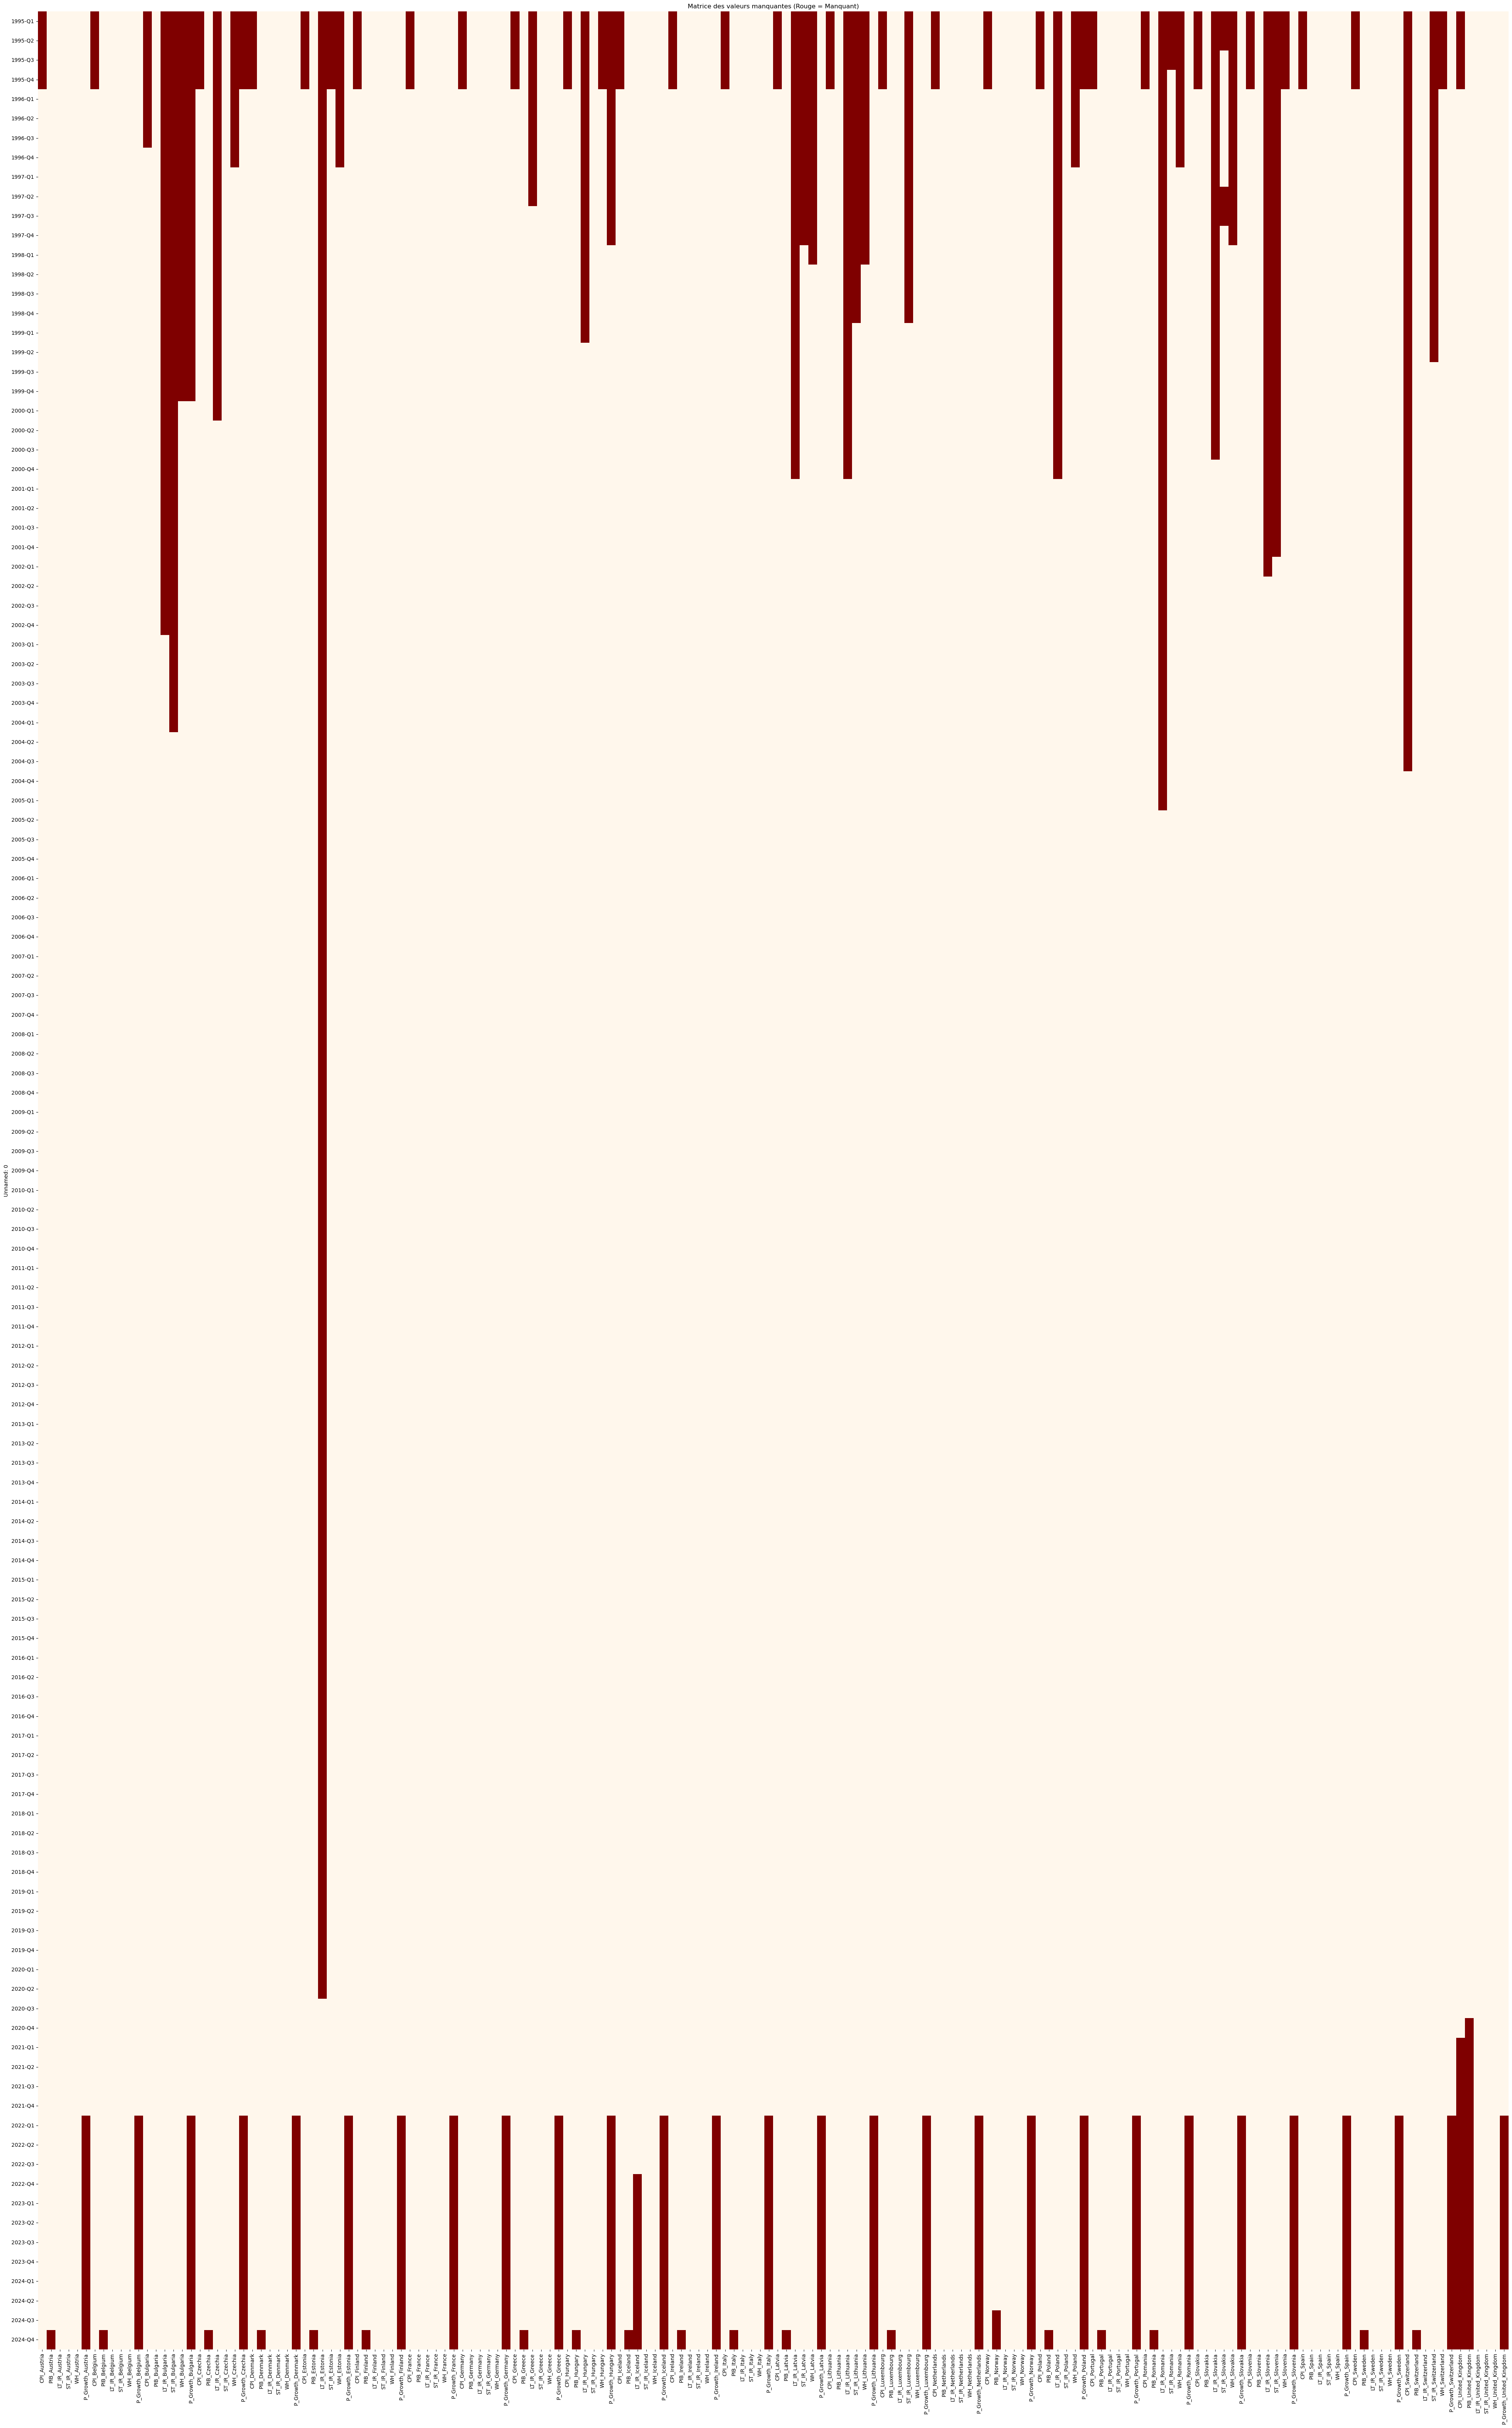

In [22]:
# Définir la figure avec un affichage interactif
fig, ax = plt.subplots(figsize=(50, 80))

# Utiliser seaborn pour une meilleure visualisation sans grille
sns.heatmap(df_missing_binary, cmap="OrRd", cbar=False, linewidths=0, ax=ax, square=False)

# Ajouter un titre
ax.set_title("Matrice des valeurs manquantes (Rouge = Manquant)")

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Afficher la figure
plt.show()

In [ ]:
#Pourcentage de données manquantes par variable
percentage_missing=((df_missing_binary.sum())/df_missing_binary.shape[0])*100

#On ne garde que les colonnes ayant des missing values
percentage_missing=percentage_missing[percentage_missing>0]
percentage_missing = percentage_missing.sort_values(ascending=False)

'''
Nous avons un problème avec l'Estonie, 85% des données pour les taux d'intérêt sont des valeurs manquantes
J'ai revérifié sur le site de l'OCDE et c'est un problème qui vient de leur bases de données. Comme c'est une 
un pourcentage considérable, on devrait peut-être retirer l'Estonie de notre analyse

Pour les données qui sont "entrecoupées" (on dirait un chemin de la route)--> c'est les Working Hours. On peut appliquer le même 
interpolation qu'on a faite pour construire le df. 

--> Voir tentative d'interpolation dans le notebook data.ipynb
Un problème persiste avec les données qui sont au début ou à la fin de la période temporelle, il faudra envisager
une autre méthode
'''
percentage_missing


### Statistiques descriptives intra-pays <a class="anchor" id="partie22"></a>

#### Résumé statistique des variables <a class="anchor" id="partie221"></a>

Nous allons tout d'abord effectuer des statistiques descriptives par pays des variables que nous avons collectées. Afin de mieux déterminer les effets de la politique monétaire et les chocs, nous avons privilégié une analyse centrée sur les périodes suivantes: 
- Avant 2008 (1995-2007)
- Après 2008 (2008-2019)
- Post-COVID (2020-2024)

Quelques lignes de code préliminaires

In [ ]:
#Fonction qui construit un vecteur contenant le nom des variables
def variables_pays(pays):
    variable_pays=[f'CPI_{pays}',f'PIB_{pays}',f'LT_IR_{pays}',f'ST_IR_{pays}',f'WH_{pays}',f'P_Growth_{pays}']
    return(variable_pays)

In [29]:
#Création d'une copie de la base de données ayant pour index des DateTime
df_TS=df.copy()
df_TS.index = pd.PeriodIndex(df.index, freq='Q')  #conversion en PeriodIndex
df_TS.index = df_TS.index.to_timestamp() #Conversion en DateTime
print(type(df.index))

''' 
Ici je ne suis pas sûr:
- pour faire des analyses en séries temporelles, il faut que les index soient des datetime
- j'ai donc converti chaque trimestre en la première date de chaque trimestre. 
- pour des graphes, et pour transformer les sorties, on peut utiliser : df.index.strftime('%Y-Q%q')
- je ne sais pas s'il y a une meileure façon de faire

'''


<class 'pandas.core.indexes.base.Index'>


" \nIci je ne suis pas sûr:\n- pour faire des analyses en séries temporelles, il faut que les index soient des datetime\n- j'ai donc converti chaque trimestre en la première date de chaque trimestre. \n- pour des graphes, et pour transformer les sorties, on peut utiliser : df.index.strftime('%Y-Q%q')\n- je ne sais pas s'il y a une meileure façon de faire\n\n"

In [5]:
#On divise le df en 3 (correspondant à chaque période)
df_TS_before_2008 = df_TS.loc[df_TS.index < '2008-01-01'].copy()
df_TS_after_2008 = df_TS.loc[(df_TS.index >= '2008-01-01') & (df_TS.index<'2020-01-01')].copy()
df_TS_after_2020 = df_TS.loc[df_TS.index >= '2020-01-01'].copy()


In [27]:
#Synthèse avant 2008
df_TS_before_2008.describe()

CPI_Austria   PIB_Austria  LT_IR_Austria  ST_IR_Austria  WH_Austria  \
count    48.000000     52.000000      52.000000      52.000000   52.000000   
mean     77.677431  55422.380769       4.915120       3.381302   39.175000   
std       4.487121   7943.450285       1.049803       0.870063    0.765782   
min      71.553333  43186.600000       3.222567       2.062951   37.400000   
25%      73.363333  48478.100000       4.152508       2.670813   38.575000   
50%      77.333333  55025.000000       4.818650       3.424899   39.350000   
75%      81.452500  60350.750000       5.558466       3.881442   39.812500   
max      86.650000  74092.600000       7.627367       5.043334   40.200000   

       P_Growth_Austria  CPI_Belgium   PIB_Belgium  LT_IR_Belgium  \
count         52.000000    48.000000     52.000000      52.000000   
mean           0.588545    77.507639  67065.700000       4.987885   
std            0.063717     5.122201  10310.457162       1.128353   
min            0.465652    70.003333  53331.500000       3.250000   
25%            0.552114    72.515833  57891.700000       4.179167   
50%            0.576752    77.433333  66230.800000       4.850000   
75%            0.642478    81.423333  74390.375000       5.599167   
max            0.685113    87.360000  90340.200000       8.293333   

       ST_IR_Belgium  ...  LT_IR_Switzerland  ST_IR_Switzerland  \
count      52.000000  ...          52.000000          34.000000   
mean        3.377841  ...           3.258474           1.475143   
std         0.910077  ...           0.773375           1.055814   
min         2.062951  ...           1.944333           0.136264   
25%         2.670813  ...           2.712750           0.645877   
50%         3.359787  ...           3.079500           1.270656   
75%         3.855243  ...           3.682750           2.279268   
max         5.706666  ...           5.275333           3.315616   

       WH_Switzerland  P_Growth_Switzerland  CPI_United_Kingdom  \
count       48.000000             52.000000           48.000000   
mean        37.341146              0.480981           74.568750   
std          0.204503              0.124752            3.874414   
min         37.000000              0.213238           68.100000   
25%         37.137500              0.422266           71.625000   
50%         37.350000              0.504647           73.883333   
75%         37.550000              0.536039           77.133333   
max         37.600000              0.669791           82.600000   

       PIB_United_Kingdom  LT_IR_United_Kingdom  ST_IR_United_Kingdom  \
count           52.000000             52.000000             52.000000   
mean        428909.325000              5.553535              5.540052   
std          92803.692986              1.271353              1.140100   
min         248722.500000              4.182400              3.569803   
25%         367466.425000              4.658075              4.615929   
50%         454437.250000              5.067450              5.579657   
75%         487710.375000              5.877325              6.338393   
max         572200.400000              8.661467              7.667380   

       WH_United_Kingdom  P_Growth_United_Kingdom  
count          52.000000                52.000000  
mean           36.325000                 0.652542  
std             0.517014                 0.170744  
min            35.100000                 0.243172  
25%            36.025000                 0.598589  
50%            36.500000                 0.676162  
75%            36.600000                 0.768325  
max            37.200000                 0.836220  

[8 rows x 168 columns]

In [ ]:
#Synthèse après 2008
df_TS_after_2008.describe()

In [ ]:
#Synthèse après 2020
df_TS_after_2020.describe()

### Statistiques descriptives inter-pays <a class="anchor" id="partie23"></a>

#### Statistiques par types de variables <a class="anchor" id="partie231"></a>

In [16]:
# Réglages d'affichage
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)    
pd.set_option('display.width', 1000) 

##### CPI <a class="anchor" id="partie2311"></a>

In [23]:
colonnes_CPI = [colonne for colonne in df_TS.columns if colonne.startswith('CPI')]
CPI = df[colonnes_CPI]
CPI.describe()

CPI_Austria  CPI_Belgium  CPI_Bulgaria  CPI_Czechia  CPI_Denmark  \
count   116.000000   116.000000    113.000000   116.000000   116.000000   
mean     93.360690    93.589943     87.633392    94.581322    92.873851   
std      16.913360    16.729539     26.622093    22.115578    13.033148   
min      71.553333    70.003333      7.280000    57.300000    70.833333   
25%      78.905833    79.008333     64.406667    78.291667    82.583333   
50%      90.140000    92.233333     97.916667    92.750000    94.266667   
75%     103.470833   104.257500    102.956667   103.341667   101.066667   
max     135.183333   133.383333    138.553333   152.600000   119.733333   

       CPI_Estonia  CPI_Finland  CPI_France  CPI_Germany  CPI_Greece  ...  \
count   116.000000   116.000000  116.000000   116.000000  116.000000  ...   
mean     88.850776    92.051638   94.097730    94.562356   91.633218  ...   
std      28.356047    13.644561   13.138351    14.207280   15.619174  ...   
min      44.020000    71.440000   74.483333    75.466667   59.533333  ...   
25%      64.529167    81.339167   82.657500    82.283333   78.437500  ...   
50%      88.021667    90.730000   94.160000    92.650000   98.780000  ...   
75%     105.360833   101.421667  101.656667   102.341667  102.064167  ...   
max     156.640000   120.513333  123.983333   129.900000  120.846667  ...   

       CPI_Norway  CPI_Poland  CPI_Portugal  CPI_Romania  CPI_Slovakia  \
count  116.000000  116.000000    116.000000   116.000000    116.000000   
mean    94.798276   91.740805     92.405259    78.268764     89.759080   
std     17.673126   23.735309     14.702079    38.872473     24.729723   
min     69.333333   43.633333     66.026667     2.760000     43.116667   
25%     81.025000   75.566667     81.594167    51.841667     73.345833   
50%     92.866667   92.683333     93.536667    87.526667     91.738333   
75%    106.191667  101.608333    102.274167   101.208333    101.103333   
max    136.333333  150.666667    123.280000   152.536667    144.826667   

       CPI_Slovenia   CPI_Spain  CPI_Sweden  CPI_Switzerland  \
count    116.000000  116.000000  116.000000        81.000000   
mean      88.913391   91.732902   95.888161       101.110947   
std       21.306544   16.145513   13.970701         2.331400   
min       44.460000   64.123333   75.716667        96.766667   
25%       76.074167   77.935000   85.316667       100.166667   
50%       94.231667   94.241667   96.228333       100.926667   
75%      101.718333  101.844167  103.540833       101.533333   
max      128.636667  124.116667  129.976667       107.750000   

       CPI_United_Kingdom  
count          100.000000  
mean            86.798333  
std             13.269004  
min             68.100000  
25%             74.375000  
50%             85.016667  
75%             99.891667  
max            109.000000  

[8 rows x 28 columns]

On remarque que les moyennes sont assez similaires aux alentours comprises entre 91 et 95 pour la plupart des pays, on a cependant certains pays pour lesquels elles sont en dessous, avec notamment l'Islande et la Roumanie sous les 80 et la Suisse est la seule au delà des 100. On remarque aussi des écart-types plus élevées (au-dessus des 20) pour les pays d'Europe de l'Est et du Nord-est (et l'Islande), contre des écart-types compris entre 13 et 17 pour la plupart des autres pays, la Suisse faisant exception avec un écart-types de 2,33. Ces différences s'expliquent par des évolutions bien plus fortes depuis les années 1995 par ces pays de l'Est. les graphes ci-dessous illustrent cela.

Concernant les valeurs présentes, il y a 116 périodes, soit du premier trimestre de 1996 au dernier de 2024, sauf pour la Bulgarie (113), qui semble commencer en 1997, le Royaume-Uni (100), qui s'arrête en 2021, et la Suisse (81), qui commence en 2005.

In [ ]:
tracer_evolution(CPI, xlabel ="Période",ylabel = "Indice des Prix à la consommation ")

Le graphique ci-dessus montre l'évolution de tous les pays et on peut observer la tendance haussière globale, pour expliciter le phénomènes de distinction on sépare en deux groupes nos pays et on les plot séparément 

In [24]:
# On sépare en deux groupe selon la valeur de l'écart-type
CPI_description = CPI.describe()
std_values = CPI_description.loc['std']
CPI_groupe_1_indices = std_values[std_values < 18].index  
CPI_groupe_2_indices = std_values[std_values > 18].index
CPI_groupe_1 = CPI[CPI_groupe_1_indices]
CPI_groupe_2 = CPI[CPI_groupe_2_indices]

# Ajout de la valeur moyenne
Moyenne_CPI_1 = CPI_groupe_1.mean(axis=1)
CPI_groupe_1['CPI_Mean'] = Moyenne_CPI_1
Moyenne_CPI_2 = CPI_groupe_2.mean(axis=1)
CPI_groupe_2['CPI_Mean'] = Moyenne_CPI_2

CPI_Moyenne = pd.DataFrame()
CPI_Moyenne["CPI_Mean_group_1"] = Moyenne_CPI_1
CPI_Moyenne["CPI_Mean_group_2"] = Moyenne_CPI_2

/tmp/ipykernel_121407/576143111.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI_groupe_1['CPI_Mean'] = Moyenne_CPI_1
/tmp/ipykernel_121407/576143111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI_groupe_2['CPI_Mean'] = Moyenne_CPI_2


In [ ]:
tracer_evolution(CPI_groupe_1, xlabel ="Période",ylabel = "Indice des Prix à la consommation (Std < 18)")

In [ ]:
tracer_evolution(CPI_groupe_2, xlabel ="Période",ylabel = "Indice des Prix à la consommation (Std < 18)")

In [ ]:
tracer_evolution(CPI_Moyenne, xlabel ="Période",ylabel = "Indice des Prix à la consommation moyen entre pour les deux groupes")

On observe mieux les différences entre le groupe 1 et le groupe 2, avec une croissance de CPI moyenne plus élevée dans le second groupe. On va essayer de voir si la différence entre ces deux groupes est aussi marquée pour les autres variables.

##### PIB <a class="anchor" id="partie2312"></a>

In [7]:
colonnes_PIB = [colonne for colonne in df_TS.columns if colonne.startswith('PIB')]
PIB = df[colonnes_PIB]
PIB.describe()

PIB_Austria    PIB_Belgium  PIB_Bulgaria   PIB_Czechia   PIB_Denmark  \
count     119.000000     119.000000    120.000000    119.000000    119.000000   
mean    75112.031933   91790.012605   9974.932500  37693.231933  61324.752941   
std     21400.928918   27377.049003   6391.492422  18891.200971  17187.519847   
min     43186.600000   53331.500000   1189.000000  10278.900000  34078.400000   
25%     56552.450000   68129.400000   4381.275000  21151.000000  47543.050000   
50%     73924.900000   90035.200000   9261.500000  38748.200000  61246.700000   
75%     90823.650000  108940.900000  12975.550000  47939.100000  72356.850000   
max    122280.300000  158085.700000  29242.600000  81790.100000  99439.300000   

        PIB_Estonia   PIB_Finland     PIB_France   PIB_Germany    PIB_Greece  \
count    119.000000    119.000000     120.000000  1.200000e+02    119.000000   
mean    4265.454622  46653.153782  491819.975833  6.969199e+05  44850.010084   
std     2583.516651  12362.902989  115813.774633  1.707389e+05   9619.443867   
min      647.200000  23318.900000  298966.500000  4.677938e+05  24031.800000   
25%     1995.150000  37005.000000  395239.375000  5.521450e+05  39180.850000   
50%     4050.300000  47525.000000  502445.700000  6.517550e+05  45060.100000   
75%     5939.850000  55499.500000  571236.450000  8.181600e+05  51341.850000   
max    10167.400000  70783.000000  757694.400000  1.101420e+06  65028.600000   

       ...     PIB_Norway     PIB_Poland  PIB_Portugal   PIB_Romania  \
count  ...     118.000000     119.000000    119.000000    119.000000   
mean   ...   73979.904237   89581.215966  42597.300840  33124.605882   
std    ...   27928.099414   45378.303193  11248.457509  22417.949331   
min    ...   28112.200000   25719.300000  21844.500000   5662.800000   
25%    ...   49850.100000   50315.900000  35878.550000  11625.650000   
50%    ...   78978.900000   90635.400000  43099.900000  31375.500000   
75%    ...   92726.750000  117076.800000  47366.600000  45188.950000   
max    ...  156907.800000  212778.500000  72667.600000  97353.100000   

       PIB_Slovakia  PIB_Slovenia      PIB_Spain     PIB_Sweden  \
count    120.000000    120.000000     120.000000     119.000000   
mean   15476.027500   8894.940000  246034.531667   94452.359664   
std     8444.783372   3321.095806   72640.270415   26587.922331   
min     3608.000000   3698.700000  109201.700000   47946.200000   
25%     6626.700000   6191.450000  188904.000000   71950.150000   
50%    16884.100000   9107.050000  260651.000000   92142.600000   
75%    21269.425000  10549.700000  286527.250000  114896.150000   
max    33870.400000  17247.700000  420897.000000  148904.200000   

       PIB_Switzerland  PIB_United_Kingdom  
count       119.000000          103.000000  
mean     118353.784034       490274.665049  
std       44469.107695       103055.855345  
min       61471.800000       248722.500000  
25%       80466.300000       444573.650000  
50%      102617.600000       492308.400000  
75%      155403.700000       568727.150000  
max      216999.800000       677282.100000  

[8 rows x 28 columns]

Concernant les valeurs présentes  il y en a entre 118 et 120 pour tous les pays, c'est à dire toutes les périodes sauf une ou deux, et le Royaume-Uni n'en a que 103, qui s'arrête en 2020, comme pour le CPI.

Ici les moyennes diffèrent grandement tout comme les écart-types. On va donc regarder l'évolution des PIB. 

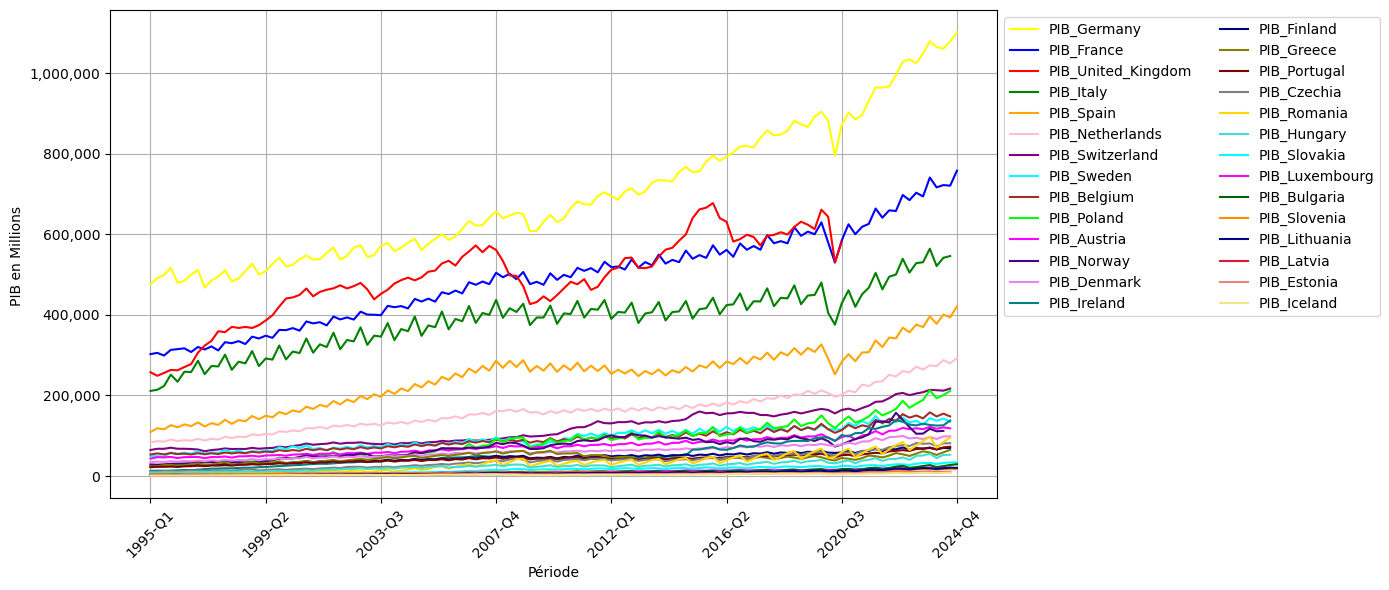

In [5]:
tracer_evolution(PIB, xlabel ="Période",ylabel = "PIB en Millions ")

On voit trois choses sur ce graphiques, d'abord qu'un grand nombre de valeurs sont écrasées par les plus grosses et donc sont difficiles à observer lorsque nous sommes en échelle linéaire, ensuite les séries semblent croissantes et avec des saisons, enfin on distingue bien la période de récession du Covid.

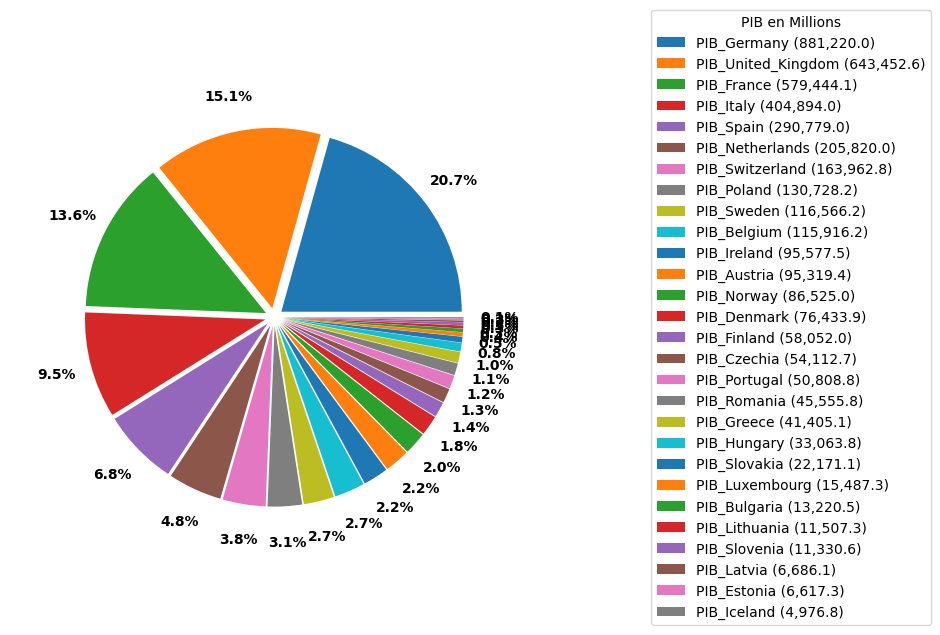

In [21]:
camembert(PIB, période = "2020-Q1", titre = "PIB en Millions")

Ce diagramme fait au premier trimestre de 2020 (dernière date où le PIB du Royaume-Uni est renseignée) illustre parfaitement le fait que les plus gros pays écrase les valeurs des plus petits, en prenant l'Allemagne, le Royaume-Uni, la France, l'Italie et l'Espagne on observe déjà 65% du PIB total, de plus 11 pays comptent pour moins de 1% du total. 

/home/onyxia/work/Stat-App/Codes/scrpits_visualisations.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filtered = df_filtered.applymap(lambda x: np.log(x) if x > 0 else np.nan)


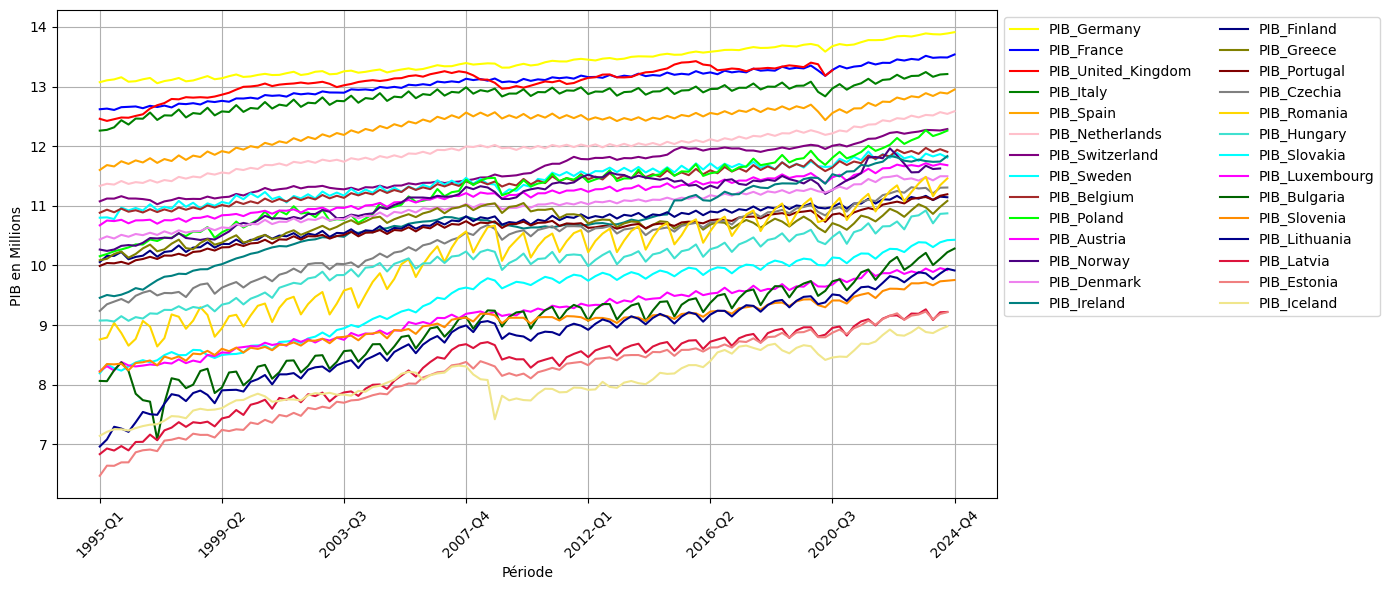

In [ ]:
tracer_evolution(PIB, xlabel ="Période",ylabel = "log(PIB) en Millions ", log = True)

En valeurs logarithmiques on voit bien la tendance linéaire assez similaire entre les séries, tout comme les variations saisonnales. Maintenant on va séparer en deux groupes les PIB afin de pouvoir mieux observer l'effet de la récession du covid. 

In [ ]:
# On sépare en deux groupe selon la valeur de la moyenne
PIB_description = PIB.describe()
PIB_mean_values = PIB_description.loc['mean']
PIB_groupe_1_indices = PIB_mean_values[PIB_mean_values > 200000].index  
PIB_groupe_2_indices = PIB_mean_values[PIB_mean_values < 200000].index
PIB_groupe_1 = PIB[PIB_groupe_1_indices]
PIB_groupe_2 = PIB[PIB_groupe_2_indices]

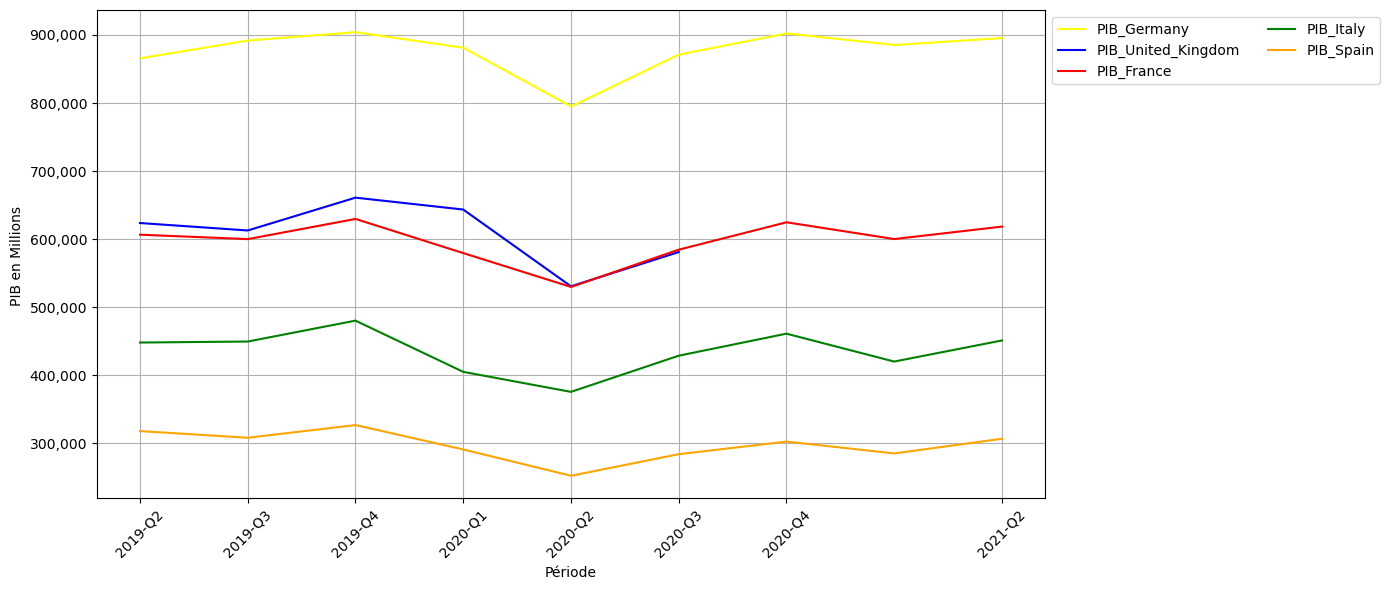

In [10]:
tracer_evolution(PIB_groupe_1, xlabel ="Période",  start_date="2019-Q2", end_date="2021-Q2", ylabel = "PIB en Millions ")

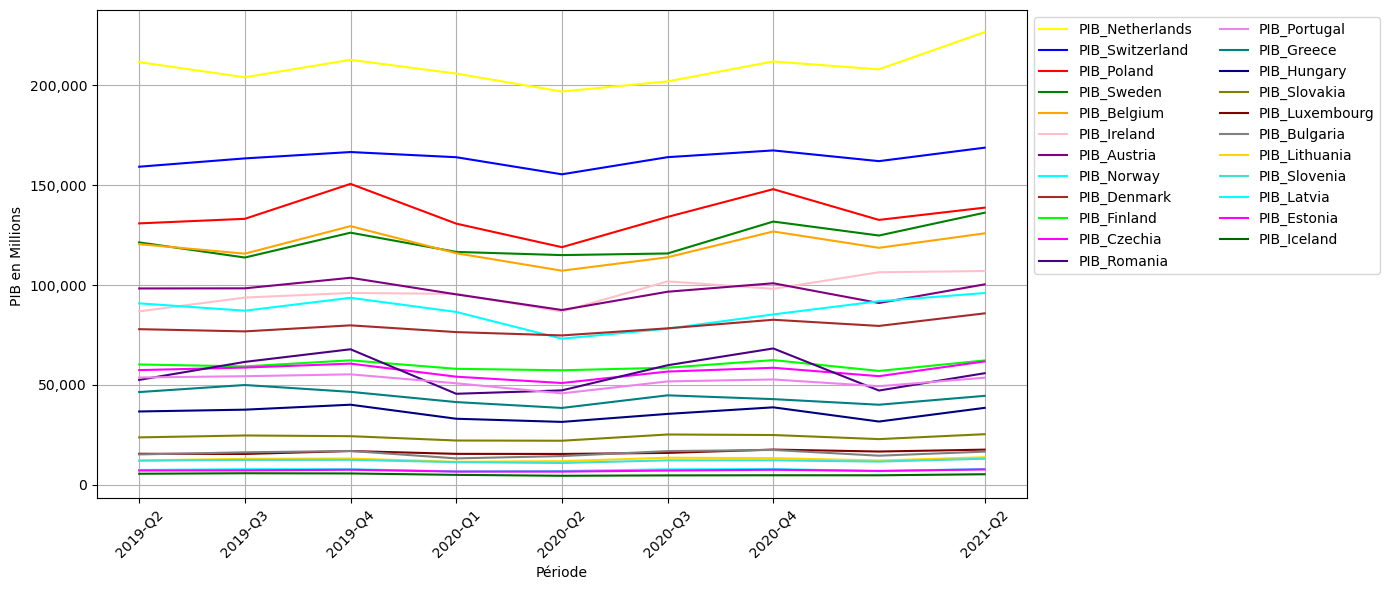

In [11]:
tracer_evolution(PIB_groupe_2, xlabel ="Période",  start_date="2019-Q2", end_date="2021-Q2", ylabel = "PIB en Millions ")

En séparant en deux groupes on constate moins la diminution due au Covid au Q2 de 2020 parmi le groupe dont le PIB moyen est en dessous de 200 Milliards.

In [8]:
comparer_periodes(PIB, "2020-Q1", "2020-Q2")

Période 1  Période 2  Différence de %
PIB_Austria           95319.4    87490.9        -8.212914
PIB_Belgium          115916.2   107165.4        -7.549247
PIB_Bulgaria          13220.5    14378.1         8.756098
PIB_Czechia           54112.7    50948.8        -5.846871
PIB_Denmark           76433.9    74767.7        -2.179923
PIB_Estonia            6617.3     6598.4        -0.285615
PIB_Finland           58052.0    57324.0        -1.254048
PIB_France           579444.1   529658.3        -8.591994
PIB_Germany          881220.0   794870.0        -9.798915
PIB_Greece            41405.1    38471.8        -7.084393
PIB_Hungary           33063.8    31484.9        -4.775313
PIB_Iceland            4976.8     4517.8        -9.222794
PIB_Ireland           95577.5    86726.3        -9.260757
PIB_Italy            404894.0   375477.5        -7.265235
PIB_Latvia             6686.1     6897.2         3.157296
PIB_Lithuania         11507.3    11851.0         2.986800
PIB_Luxembourg        15487.3    15442.3        -0.290561
PIB_Netherlands      205820.0   196847.0        -4.359635
PIB_Norway            86525.0    73125.5       -15.486276
PIB_Poland           130728.2   118931.6        -9.023761
PIB_Portugal          50808.8    45758.3        -9.940207
PIB_Romania           45555.8    47260.2         3.741346
PIB_Slovakia          22171.1    22057.8        -0.511026
PIB_Slovenia          11330.6    10923.8        -3.590278
PIB_Spain            290779.0   252148.0       -13.285347
PIB_Sweden           116566.2   114971.8        -1.367806
PIB_Switzerland      163962.8   155409.8        -5.216427
PIB_United_Kingdom   643452.6   530595.8       -17.539256

In [19]:
print(comparer_periodes(PIB, "2020-Q1", "2020-Q2")['Différence de %'].mean())

-5.117752036363803


En observant la différence entre les deux premiers trimestres de 2020 on observe très bien la récession du confinement. La récession moyenne est de -5.12%.

Pour revenir à la séparation des groupes faites lors de l'analyse du CPI, on remarque que tous les pays du groupes 2 précédent sont encore dans le groupe 2 en terme de PIB et que certains pays du groupe 1 sont maintenant dans ce groupe, ce sont surtout les pays d'Europe Centrale et du Nord ayant des populations plus faibles. On pourrait donc être amené à distinguer par la suite trois groupes, les économies qui en train de se développer, les petites économies développées et les grandes économies développées. 

In [ ]:
print(PIB_groupe_2_indices, CPI_groupe_2_indices)

Index(['PIB_Austria', 'PIB_Belgium', 'PIB_Bulgaria', 'PIB_Czechia',
       'PIB_Denmark', 'PIB_Estonia', 'PIB_Finland', 'PIB_Greece',
       'PIB_Hungary', 'PIB_Iceland', 'PIB_Ireland', 'PIB_Latvia',
       'PIB_Lithuania', 'PIB_Luxembourg', 'PIB_Netherlands', 'PIB_Norway',
       'PIB_Poland', 'PIB_Portugal', 'PIB_Romania', 'PIB_Slovakia',
       'PIB_Slovenia', 'PIB_Sweden', 'PIB_Switzerland'],
      dtype='object') Index(['CPI_Bulgaria', 'CPI_Czechia', 'CPI_Estonia', 'CPI_Hungary',
       'CPI_Iceland', 'CPI_Latvia', 'CPI_Lithuania', 'CPI_Poland',
       'CPI_Romania', 'CPI_Slovakia', 'CPI_Slovenia'],
      dtype='object')


##### Taux d'intérêts <a class="anchor" id="partie2313"></a>

In [4]:
colonnes_LT = [colonne for colonne in df_TS.columns if colonne.startswith('LT')]
LT = df[colonnes_LT]
LT.describe()

LT_IR_Austria  LT_IR_Belgium  LT_IR_Bulgaria  LT_IR_Czechia  \
count     120.000000     120.000000       88.000000      99.000000   
mean        3.146303       3.286417        3.500985       3.305073   
std         2.029545       2.032646        2.056659       1.728455   
min        -0.410600      -0.370000        0.140000       0.301695   
25%         1.242808       1.340834        1.802500       1.791774   
50%         3.432484       3.673333        3.696667       3.714909   
75%         4.545233       4.576666        5.137500       4.534434   
max         7.627367       8.293333        7.593333       7.442648   

       LT_IR_Denmark  LT_IR_Estonia  LT_IR_Finland  LT_IR_France  \
count     120.000000      18.000000     120.000000    120.000000   
mean        3.108289       2.170741       3.178305      3.165961   
std         2.281636       1.752985       2.227170      1.987021   
min        -0.492667      -0.133333      -0.396667     -0.320000   
25%         1.072000       0.135833       1.150833      1.355658   
50%         3.267333       3.043334       3.355000      3.434900   
75%         4.518333       3.694167       4.506667      4.477183   
max         8.960000       4.163333      10.213330      8.088200   

       LT_IR_Germany  LT_IR_Greece  ...  LT_IR_Norway  LT_IR_Poland  \
count     120.000000    110.000000  ...    120.000000     96.000000   
mean        2.830254      6.364394  ...      3.805418      4.943912   
std         2.092555      4.572442  ...      1.857008      2.052522   
min        -0.613512      0.696667  ...      0.606667      1.250000   
25%         0.922880      3.985833  ...      2.020000      3.289242   
50%         3.155577      4.998334  ...      3.743334      5.348333   
75%         4.333534      7.796667  ...      5.329167      5.991667   
max         7.432434     26.003330  ...      8.046667     11.713330   

       LT_IR_Portugal  LT_IR_Romania  LT_IR_Slovakia  LT_IR_Slovenia  \
count      120.000000      79.000000       97.000000       91.000000   
mean         4.572667       5.884494        3.282994        3.339985   
std          2.788568       1.830615        2.244952        2.182669   
min          0.093333       2.776667       -0.421858       -0.180000   
25%          3.070000       4.313333        0.984319        1.213333   
50%          4.216667       6.446667        3.749246        3.750000   
75%          5.467500       7.140833        4.751825        4.708666   
max         13.223330      11.306670        8.330000        9.310000   

       LT_IR_Spain  LT_IR_Sweden  LT_IR_Switzerland  LT_IR_United_Kingdom  
count   120.000000    120.000000         120.000000            120.000000  
mean      3.958722      3.270705           1.785481              3.757386  
std       2.354879      2.445675           1.570003              2.036608  
min       0.100000     -0.166367          -0.776333              0.251367  
25%       2.104167      1.357500           0.415833              1.980817  
50%       4.098333      3.130000           1.952500              4.102700  
75%       5.139167      4.690834           3.020833              4.919459  
max      11.906670     10.963330           5.275333              8.661467  

[8 rows x 28 columns]

In [5]:
colonnes_ST = [colonne for colonne in df_TS.columns if colonne.startswith('ST')]
ST = df[colonnes_ST]
ST.describe()

ST_IR_Austria  ST_IR_Belgium  ST_IR_Bulgaria  ST_IR_Czechia  \
count     120.000000     120.000000       83.000000     120.000000   
mean        1.936789       1.935289        2.512472       4.052741   
std         1.824380       1.831535        2.219372       4.270747   
min        -0.566377      -0.566377        0.002833       0.280000   
25%         0.072607       0.072607        0.273917       1.113934   
50%         2.127494       2.127494        1.915267       2.351882   
75%         3.488333       3.468677        4.335667       5.389143   
max         5.043334       5.706666        7.448367      19.670380   

       ST_IR_Denmark  ST_IR_Estonia  ST_IR_Finland  ST_IR_France  \
count     120.000000     116.000000     120.000000    120.000000   
mean        2.229275       3.126720       1.974622      2.019914   
std         2.022472       3.605726       1.894259      1.969604   
min        -0.422810      -0.566377      -0.566377     -0.566377   
25%         0.171664       0.032881       0.072607      0.072607   
50%         2.197433       2.480000       2.127494      2.127494   
75%         3.823063       5.328333       3.515579      3.553495   
max         6.854634      18.090000       6.053333      7.482500   

       ST_IR_Germany  ST_IR_Greece  ...  ST_IR_Norway  ST_IR_Poland  \
count     120.000000    120.000000  ...    120.000000    120.000000   
mean        1.925650      3.696374  ...      3.385382      7.802582   
std         1.814950      4.903212  ...      2.137682      7.466291   
min        -0.566377     -0.566377  ...      0.246667      0.210000   
25%         0.072607      0.072607  ...      1.666041      2.633333   
50%         2.127494      2.127494  ...      2.706666      4.995783   
75%         3.462010      4.485126  ...      5.073333      8.576666   
max         5.110000     18.116840  ...      8.040000     29.710000   

       ST_IR_Portugal  ST_IR_Romania  ST_IR_Slovakia  ST_IR_Slovenia  \
count      120.000000     117.000000      116.000000       92.000000   
mean         2.342233      21.243959        3.991954        1.978703   
std          2.539213      29.604253        5.222604        2.515926   
min         -0.566377       0.763333       -0.566377       -0.566377   
25%          0.072607       3.100000        0.032881       -0.298761   
50%          2.127494       7.263333        2.635963        0.872057   
75%          3.846147      22.386670        5.947500        3.969759   
max         10.527000     126.493300       23.390000        8.633333   

       ST_IR_Spain  ST_IR_Sweden  ST_IR_Switzerland  ST_IR_United_Kingdom  
count   120.000000    120.000000         102.000000            120.000000  
mean      2.317639      2.149373           0.462934              3.250136  
std       2.488101      2.248216           1.169639              2.532037  
min      -0.566377     -0.776667          -0.898711              0.040000  
25%       0.072607      0.143333          -0.699988              0.621613  
50%       2.127494      1.943334           0.113354              3.959275  
75%       3.846147      3.887500           1.222661              5.518449  
max       9.543667      9.110000           3.315616              7.667380  

[8 rows x 28 columns]

Les valeurs renseignées pour les taux d'intérêts de long-termes sont assez hétérogènes. 16 pays ont toutes les valeurs de renseignées, les autres pays ont entre 91 et 110 valeurs renseignée sauf la Roumanie avec 79, la Bulgarie avec 88 et l'Estonie avec seulement 18. Concernant les taux à court-terme on a cette fois 19 pays avec toutes les valeurs renseignées et pour les autres on a seulement la Slovénie (avec 92 valeurs) et la Bulgarie (avec 83 valeurs) sous les 100 valeurs renseignée. 

Les moyennes des taux de long terme oscille entre 1,78% pour la Suisse et 7,20% pour l'Islande, avec une majorité des pays au alentour des 3-4%. (21 pays), il y a l'Estonie à 2,1 % et le reste au alentour des 5-6%. Les écart-types sont relativement proches des 2 sauf pour la Grèce avec 4,5, la Lettonie avec 3,9 et la Lituanie avec 3,6.

Pour les taux de court terme les moyennes sont aux environs des 2% pour la plupart des pays des pays d'Europe de l'Ouest et du Nord, et sont plus hautes en moyenne pour les pays d'Europe de l'Est avec notamment la Roumanie et ses 21% de moyenne, la Hongrie avec ses 8,8% et la Pologne avec ses 7,8%. les écart-types sont relativement proches des valeurs moyennes.

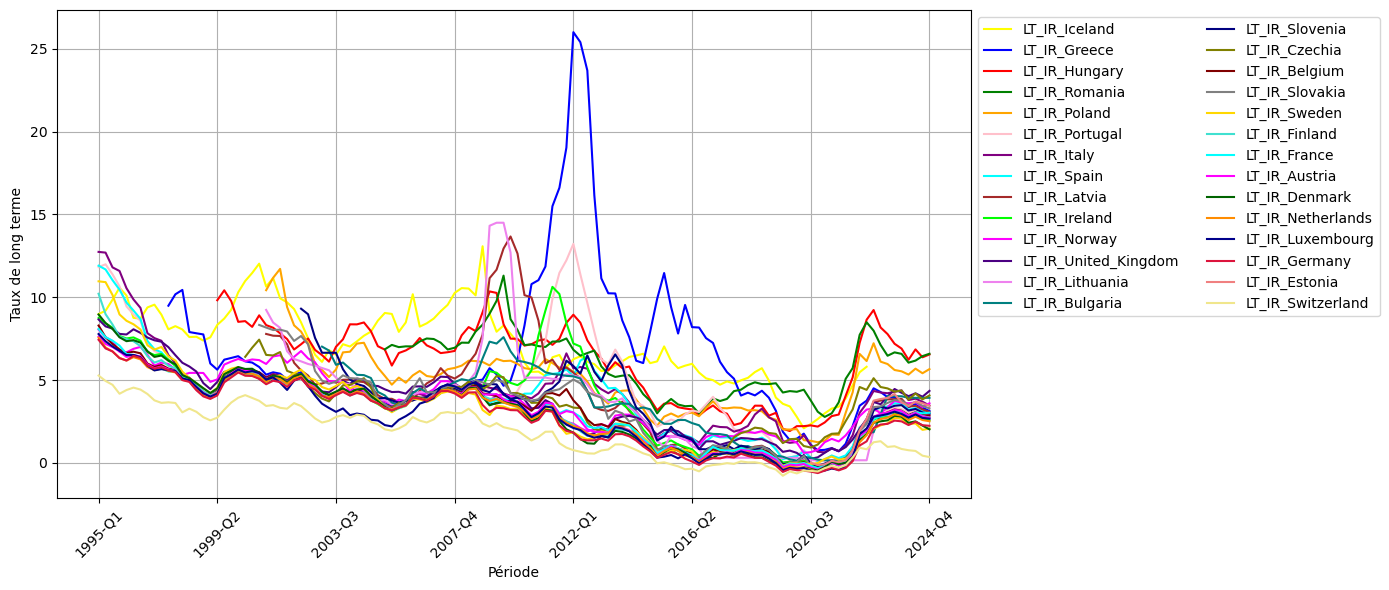

In [ ]:
tracer_evolution(LT, xlabel ="Période", ylabel = "Taux de long terme")

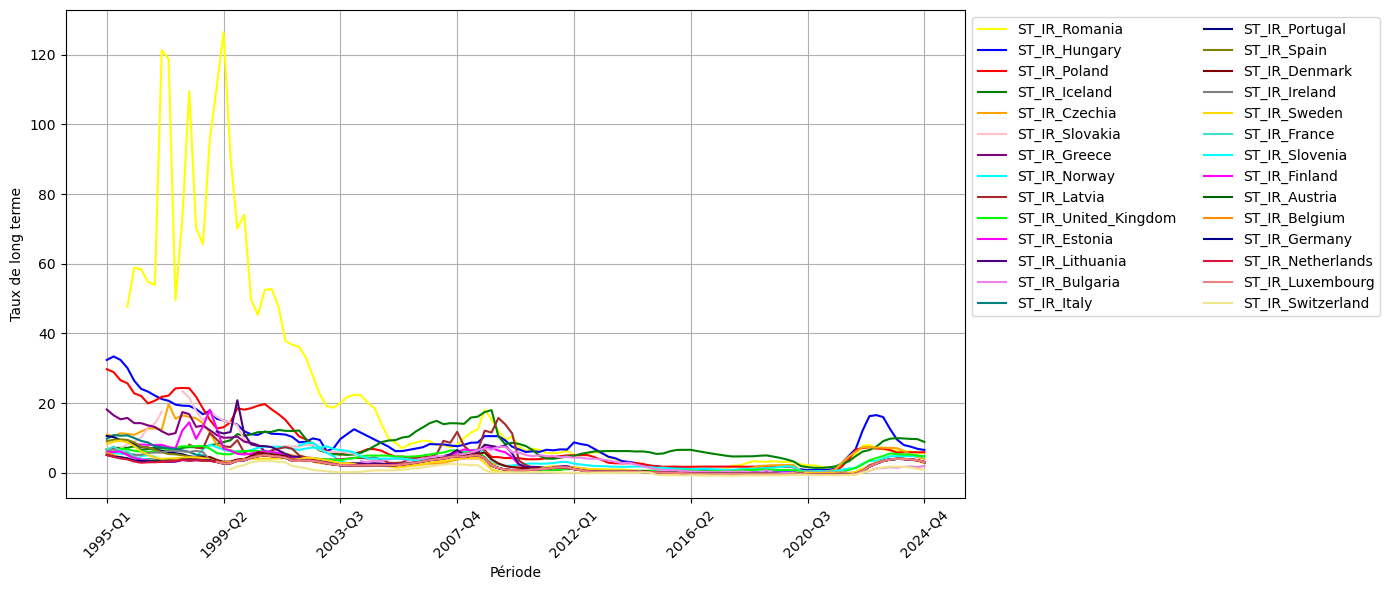

In [ ]:
tracer_evolution(ST, xlabel ="Période", ylabel = "Taux de court terme")

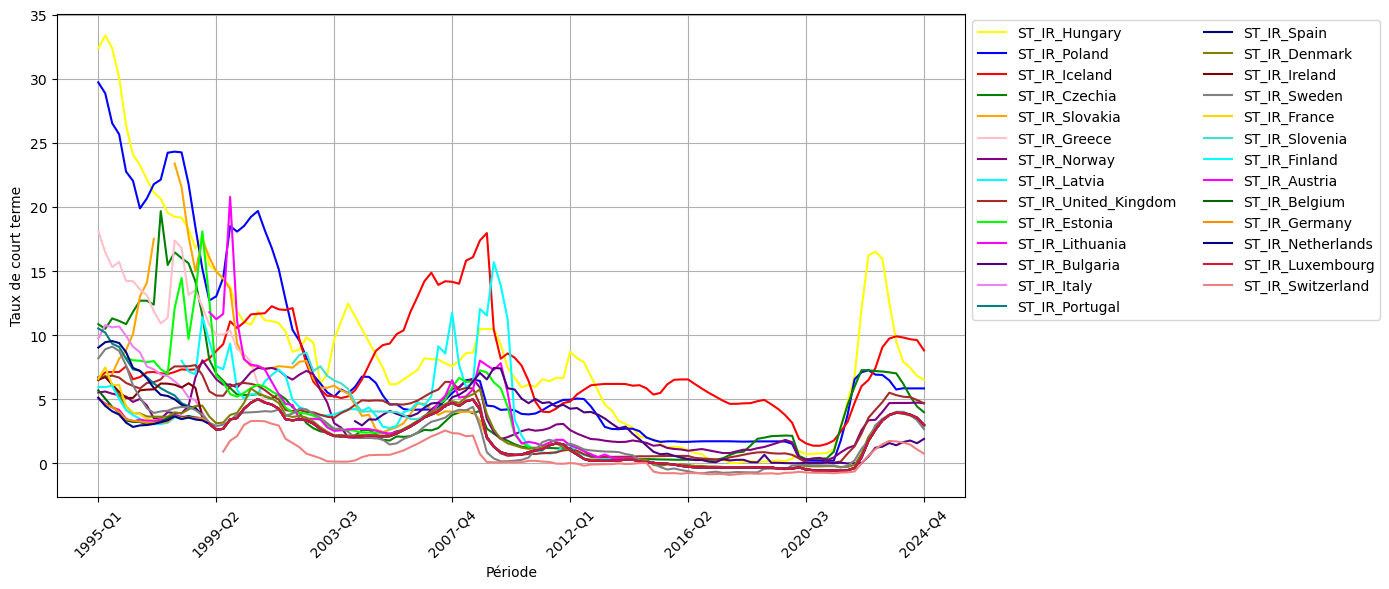

In [40]:
ST_wo_Roumania = ST.drop(columns = ["ST_IR_Romania"])
tracer_evolution(ST_wo_Roumania, xlabel ="Période", ylabel = "Taux de court terme")

On sort la Roumanie de la représentation des taux de court-terme car ses valeurs sont trop grandes. Pour les taux de long-terme on observe une corrélation entre les taux assez forte avec une tendance décroissante marquée par deux bosses en 2008 et 2012 qui correspondent à la crise des subprimes et de l'euro, puis une troisième en 2022 qui est celle qui nous intéresse pour cette étude. Concernant les taux de court-terme on a des fortes irrégularités jusqu'en 2003, puis une période de stabilisation avant une hausse en 2008 et une autre périodes stable jusqu'à la hausse de 2022.

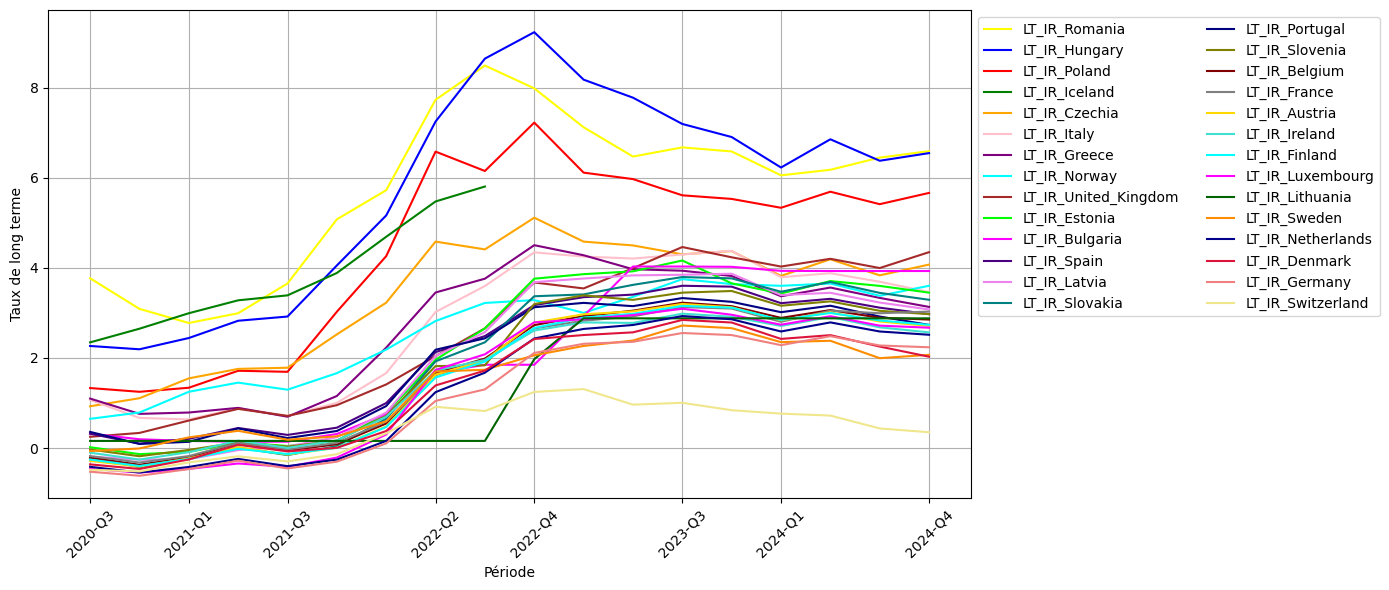

In [41]:
tracer_evolution(LT, xlabel ="Période", start_date="2020-Q3", end_date="2024-Q4",ylabel = "Taux de long terme")

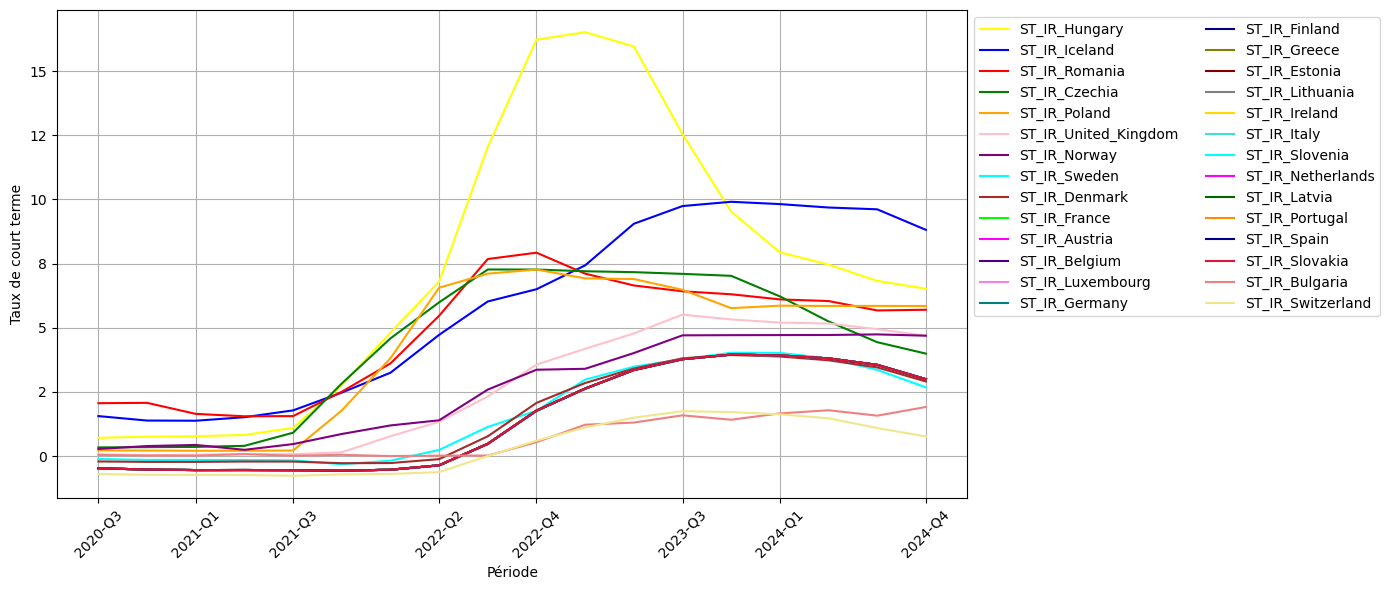

In [42]:
tracer_evolution(ST, xlabel ="Période", start_date="2020-Q3", end_date="2024-Q4",ylabel = "Taux de court terme")

En regardant plus précisément les périodes qui nous intéressent, on remarque que la hausse débute dès le Q1 de 2021 et semble se stabiliser à partir du Q3 de 2023.

In [ ]:
comparer_periodes(LT, "2021-Q1", "2023-Q3", percent = False)

Période 1  Période 2  Différence de %
LT_IR_Austria         -0.143733   3.199733         3.343466
LT_IR_Belgium         -0.053333   3.226667         3.280000
LT_IR_Bulgaria         0.143333   4.030000         3.886667
LT_IR_Czechia          1.784098   4.301424         2.517326
LT_IR_Denmark         -0.073000   2.845000         2.918000
LT_IR_Estonia          0.046667   4.163333         4.116666
LT_IR_Finland         -0.131515   3.156667         3.288182
LT_IR_France          -0.030000   3.130000         3.160000
LT_IR_Germany         -0.450909   2.554582         3.005491
LT_IR_Greece           0.696667   3.936667         3.240000
LT_IR_Hungary          2.920000   7.193333         4.273333
LT_IR_Iceland          3.390000        NaN              NaN
LT_IR_Ireland          0.006500   2.983467         2.976967
LT_IR_Italy            0.717667   4.297000         3.579333
LT_IR_Latvia           0.036667   3.846667         3.810000
LT_IR_Lithuania        0.160000   2.880000         2.720000
LT_IR_Luxembourg      -0.415000   3.092667         3.507667
LT_IR_Netherlands     -0.400000   2.931000         3.331000
LT_IR_Norway           1.296667   3.750397         2.453730
LT_IR_Poland           1.693333   5.610000         3.916667
LT_IR_Portugal         0.223333   3.330000         3.106667
LT_IR_Romania          3.653333   6.673333         3.020000
LT_IR_Slovakia        -0.154328   3.796202         3.950530
LT_IR_Slovenia         0.033333   3.450000         3.416667
LT_IR_Spain            0.293333   3.603333         3.310000
LT_IR_Sweden           0.186857   2.720597         2.533740
LT_IR_Switzerland     -0.295333   1.006000         1.301333
LT_IR_United_Kingdom   0.714733   4.462300         3.747567

In [11]:
print(comparer_periodes(LT, "2021-Q1", "2023-Q3", percent = False).mean(), comparer_periodes(ST, "2021-Q1", "2023-Q3", percent = False).mean())

Période 1          0.423246
Période 2          3.710014
Différence de %    3.381956
dtype: float64 Période 1         -0.194192
Période 2          4.559324
Différence de %    4.753516
dtype: float64


Ainsi on voit qu'il y a eu une hausse moyenne des taux de 3,38 points de pourcentages pour les taux de long terme et de 4,75 points de pourcentages pour les taux de court terme.

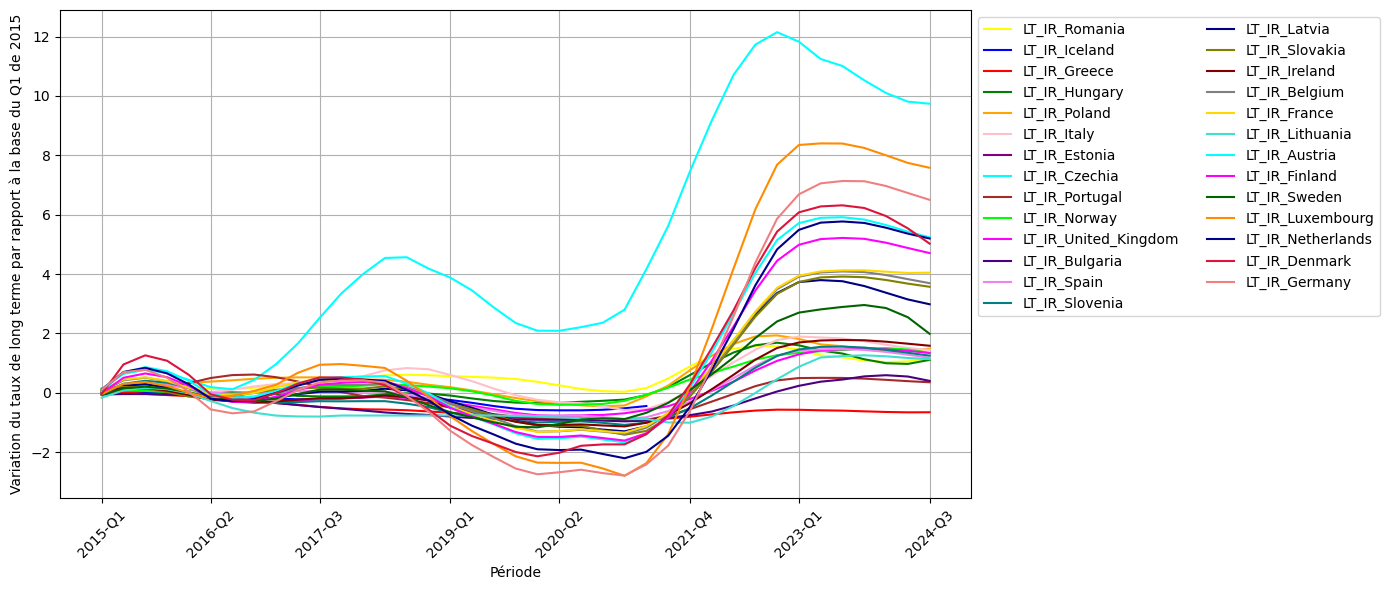

In [14]:
LT_wo_Switzerland = LT.drop(columns = ["LT_IR_Switzerland"])
tracer_evolution(LT_wo_Switzerland, xlabel ="Période", start_date="2015-Q1", end_date="2024-Q3",ylabel = "Variation du taux de long terme par rapport à la base du Q1 de 2015", base = "2015-Q1", lissage = True)

On observe bien sur ce graphique en avec comme base le premier trimestre de 2015 la hausse soudaine des taux dès le premier trimestre de 2021 et ce jusqu'au deuxième, voire troisième trimestre de 2023. Et ce pour tous les pays, on ne le voit pas pour la Grèce sur ce graphique, mais cela est dû à sa base qui est très élevé en 2015 étant en train de sortir d'une crise de la dette, dont on a observé les hausses massives de taux sur les graphiques précédents.

##### Heures travaillées <a class="anchor" id="partie2314"></a>

In [17]:
colonnes_WH = [colonne for colonne in df_TS.columns if colonne.startswith('WH')]
WH = df[colonnes_WH]
WH.describe()

WH_Austria  WH_Belgium  WH_Bulgaria  WH_Czechia  WH_Denmark  WH_Estonia  WH_Finland   WH_France  WH_Germany   WH_Greece  WH_Hungary  WH_Iceland  WH_Ireland    WH_Italy   WH_Latvia  WH_Lithuania  WH_Luxembourg  WH_Netherlands   WH_Norway   WH_Poland  WH_Portugal  WH_Romania  WH_Slovakia  WH_Slovenia    WH_Spain   WH_Sweden  WH_Switzerland  WH_United_Kingdom
count  120.000000  120.000000   100.000000  112.000000  120.000000  112.000000   120.00000  120.000000  120.000000  120.000000  116.000000  120.000000  120.000000  120.000000  107.000000    107.000000     120.000000      120.000000  120.000000  112.000000   120.000000  112.000000   108.000000   116.000000  120.000000  120.000000      116.000000         120.000000
mean    37.045000   36.610417    40.184000   40.487054   34.644583   38.850893    36.55000   36.904583   36.253333   41.057083   39.598276   39.542083   36.700833   37.481667   39.731308     38.352336      37.760417       31.782083   34.339167   40.007589    38.921667   39.591071    39.659259    39.439224   37.672917   35.613750       36.878879          36.018333
std      2.221641    1.025989     0.809005    1.961545    0.920628    1.539399     1.38243    1.343186    1.452369    1.050221    1.492169    2.248302    1.741564    1.341413    1.719787      0.685407       1.176460        0.645828    1.151847    1.156697     1.074548    0.828907     1.397263     1.268345    1.035781    0.906436        0.654948           0.479624
min     31.800000   33.800000    36.800000   36.400000   32.400000   35.700000    33.50000   34.000000   33.500000   38.900000   36.400000   34.000000   34.200000   34.800000   37.300000     36.600000      34.200000       30.100000   31.500000   37.500000    36.200000   38.000000    37.200000    37.400000   35.400000   33.400000       34.000000          35.100000
25%     35.375000   36.300000    39.800000   39.000000   34.000000   37.600000    35.60000   36.100000   35.200000   40.300000   38.475000   38.000000   35.175000   36.300000   38.300000     37.900000      37.300000       31.400000   33.300000   39.200000    38.200000   39.000000    38.675000    38.450000   36.900000   34.993750       36.400000          35.700000
50%     37.200000   36.750000    40.300000   40.700000   34.600000   38.850000    36.50000   36.600000   35.900000   41.000000   39.600000   39.800000   36.200000   37.200000   38.900000     38.400000      37.900000       31.850000   34.200000   39.800000    38.850000   39.550000    39.500000    39.250000   37.750000   35.750000       37.100000          35.900000
75%     39.100000   37.300000    40.700000   41.725000   35.125000   40.100000    37.44375   37.525000   37.425000   41.856250   40.825000   41.675000   38.100000   38.943750   41.300000     38.700000      38.600000       32.300000   35.100000   40.700000    39.625000   40.200000    40.725000    40.500000   38.300000   36.300000       37.400000          36.412500
max     40.200000   38.500000    41.800000   44.400000   36.800000   41.300000    39.60000   39.700000   38.700000   43.700000   42.000000   43.000000   40.100000   40.200000   43.100000     41.200000      39.700000       33.200000   37.300000   42.400000    41.600000   41.600000    42.900000    42.200000   40.000000   37.400000       37.900000          37.200000

Pour les heures travaillées tous les pays ont au moins 100 valeurs renseignées avec 11 pays sur 28 qui n'ont pas toute leurs valeurs. Les moyennes oscillent entre 34 et 40, sauf pour les Pays-Bas avec 31 heures et il y a 4 pays au dessus des 40 heures, à savoir la Bulgarie, la Tchéquie, la Grèce et la Pologne. Les écarts-types sont aussi faibles.

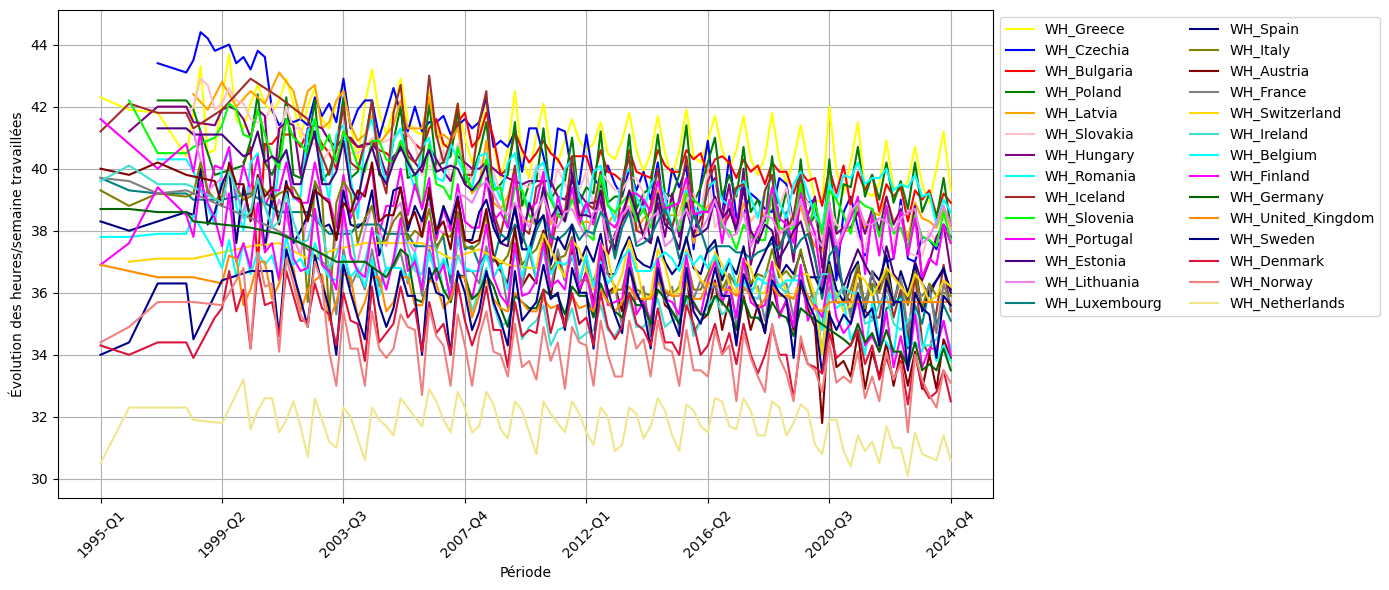

In [18]:
tracer_evolution(WH, xlabel ="Période", ylabel = "Évolution des heures/semaine travaillées")

Les données sont vraiment exploitables à partir de 1999 et semble suivre une tendance décroissante et être très impactées par la saisonnalité, ce qu'il faudra vérifier. 

##### Croissance potentielle <a class="anchor" id="partie2315"></a>

In [30]:
colonnes_PG = [colonne for colonne in df_TS.columns if colonne.startswith('P_')]
PG = df[colonnes_PG]
PG.describe()

P_Growth_Austria  P_Growth_Belgium  P_Growth_Bulgaria  P_Growth_Czechia  P_Growth_Denmark  P_Growth_Estonia  P_Growth_Finland  P_Growth_France  P_Growth_Germany  P_Growth_Greece  P_Growth_Hungary  P_Growth_Iceland  P_Growth_Ireland  P_Growth_Italy  P_Growth_Latvia  P_Growth_Lithuania  P_Growth_Luxembourg  P_Growth_Netherlands  P_Growth_Norway  P_Growth_Poland  P_Growth_Portugal  P_Growth_Romania  P_Growth_Slovakia  P_Growth_Slovenia  P_Growth_Spain  P_Growth_Sweden  P_Growth_Switzerland  P_Growth_United_Kingdom
count        107.000000        107.000000         107.000000        107.000000        107.000000        107.000000        107.000000       107.000000        107.000000       107.000000        107.000000        107.000000        107.000000      107.000000       107.000000          107.000000           107.000000            107.000000       107.000000       107.000000         107.000000        107.000000         107.000000         107.000000      107.000000       107.000000            107.000000               107.000000
mean           1.628410          1.716182           3.624591          2.290917          1.624269          3.855846          2.011122         1.446877          1.232893         0.772637          2.873834          3.107663          5.528257        0.500425         3.568074            3.976452             3.256163              1.861782         1.972091         3.759732           1.209039          3.011522           3.370443           2.615305        1.826279         2.355100              1.818961                 1.822031
std            0.669214          0.568715           1.838424          0.852127          0.710489          1.764745          1.502960         0.658504          0.249480         2.859131          1.474635          0.966900          2.135677        0.919903         2.021447            1.372945             1.116642              0.920968         0.898603         0.352448           1.237478          1.049479           1.072185           1.220315        1.399808         0.554854              0.294748                 0.750014
min            0.813425          1.023100           1.106351         -0.535359          0.865896          1.388653          0.093276         0.621901          0.381115        -3.282469          1.377850          1.456294          3.151835       -0.656185         0.685437            2.050908             1.810186              0.849534         1.158687         3.157786          -0.151562         -0.878275           1.366294           0.864752       -0.015956         1.639956              1.074443                 1.070191
25%            0.956761          1.157273           1.775379          1.738963          1.006292          2.082122          0.553284         0.807957          1.148849        -2.108782          1.642208          2.281978          3.605763       -0.379850         1.549794            2.604191             2.167483              1.046901         1.273347         3.458759           0.113918          2.749783           2.498071           1.391481        0.445770         1.809740              1.559079                 1.144970
50%            1.534723          1.611657           3.525924          2.313492          1.409678          3.866466          1.816135         1.320729          1.253296         0.942709          2.420639          3.107663          4.931013        0.342474         3.693770            4.035888             3.110181              1.617271         1.604525         3.759732           0.869539          3.203866           3.620702           2.740271        1.694721         2.253661              1.850693                 1.568147
75%            2.330661          2.322631           5.479251          3.013530          2.099754          5.606877          3.544830         2.162649          1.372755         3.626860          3.697825          3.933347          7.137448        1.327610         5.538112            5.335375             4.409023              2.472676     

Les données ont été obtenue par interpolation polynomiale donc on a toutes les valeurs jusqu'à 2021 là où s'arrêtais les valeurs de la série initiale. Les moyennes sont comprises entre 1,2 et 4 avec l'Ireland à 5 et l'Italie à 0.5.

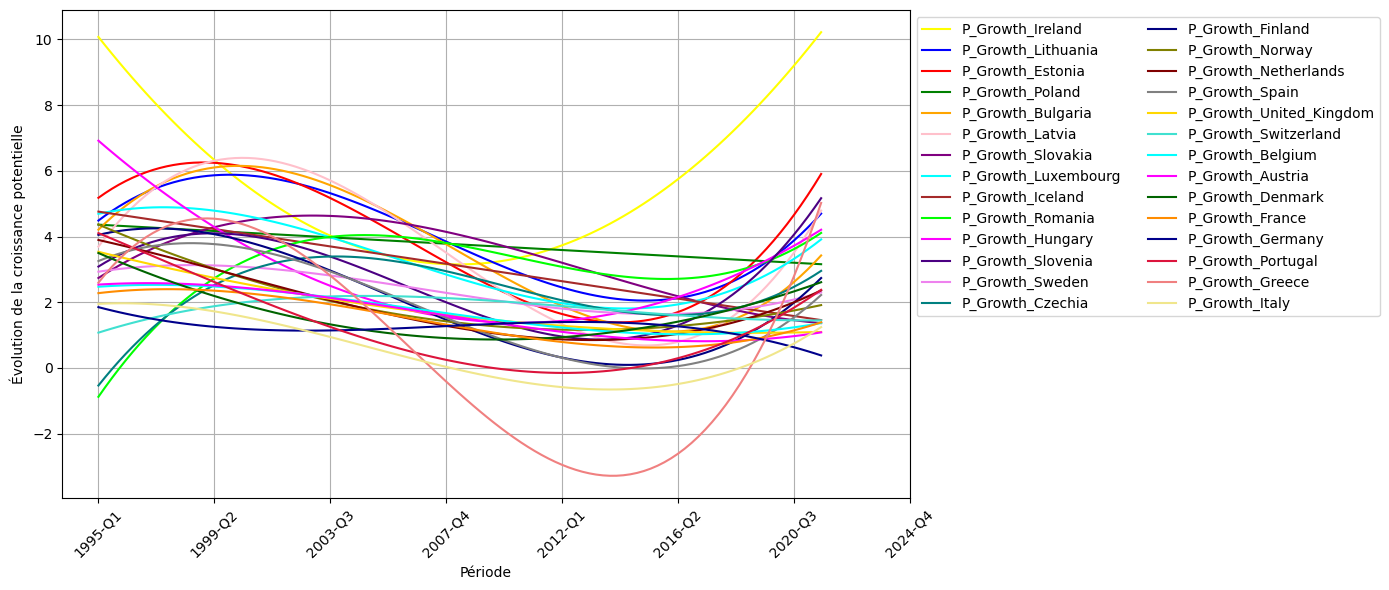

In [ ]:
tracer_evolution(PG, xlabel ="Période", ylabel = "Évolution de la croissance potentielle")

On voit très bien l'interpolation polynomiale des variables et on perçoit une phase de baisse de la croissance potentielle entre 2003 et 2016 avant de remonter plus nettement.

#### Étude des corrélations <a class="anchor" id="partie222"></a>

Correlations\
Idée: nous allons étudier les correlations entre plusieurs variables de 4 pays (corrélations à l'intérieur du même pays)

In [ ]:
France=variables_pays('France')
Germany=variables_pays('Germany')
Denmark=variables_pays('Denmark')
Romania=variables_pays('Romania')

plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
sns.heatmap(df[France].corr())
plt.title("Matrice de corrélation des variables de la France")

plt.subplot(2,2,2)
sns.heatmap(df[Germany].corr())
plt.title("Matrice de corrélation des variables de l'Allemagne")

plt.subplot(2,2,3)
sns.heatmap(df[Denmark].corr())
plt.title("Matrice de corrélation des variables du Danemark")

plt.subplot(2,2,4)
sns.heatmap(df[Romania].corr())
plt.title("Matrice de corrélation des variables de la Roumanie")



### Une première analyse exploratoire des séries temporelles <a class="anchor" id="partie24"></a>

Pour chaque variable, nous allons déterminer  le tendances et les saisonalités des séries temporelles. Compte tenu du nombre de pays dans notre échantillon, nous allons tout d'abord faire cette analyse pour la France et pour les principaux pays d'Europe. 

#### Données du PIB <a class="anchor" id="partie241"></a>

In [ ]:
#Fonction qui effectue la représentation de l'évolution du PIB d'un seul pays. 

def graphe_PIB(pays): 
    plt.figure(figsize=(14, 6))  # Taille du graphique

    plt.plot(df_TS.index, df_TS[f'PIB_{pays}'], marker='o', linestyle='-')

    plt.xlabel("Période")
    plt.ylabel("PIB en millions")
    plt.title(f"Évolution du PIB - {pays} (1995-2024)")

    #   Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
    num_ticks = 8  # Nombre de labels affichés sur l'axe X
    indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
    plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

    plt.grid(True)
    return(plt.show())


In [ ]:
#Représentation graphique de plusieurs pays
selected_countries = ['Austria', 'France', 'United_Kingdom','Spain', 'Italy', 'Netherlands', 'Switzerland'] #Ici pon peut choisir les pays que l'on veut
df_selected = df.loc[:,[f'PIB_{pays}' for pays in selected_countries]]

def PIB_Groupes(group)
colors = plt.cm.get_cmap("tab10", len(df_selected.columns))  # Utilisation d'une palette de couleurs
plt.figure(figsize=(14, 6))

for i, country in enumerate(df_selected.columns): #enumerate permet de sélectionner l'élément et son indice
    plt.plot(df_selected.index, df_selected[country], label=country, color=colors(i))

# Personnalisation du graphique
plt.xlabel("Période")
plt.ylabel("PIB en Millions")
plt.title("Principaux PIB trimestriels en Europe ")

# Indicage
num_ticks = 8 
indices = np.linspace(0, len(df_selected.index) - 1, num_ticks, dtype=int)  
plt.xticks(df_selected.index[indices], rotation=45) 

# Affichage 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)  # Légende en dehors du graphique
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #permet de ne pas avoir d'écriture scientifique
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['PIB_France'].resample('Q').mean())
plt.show()

A première vue, il semblerait qu'il n'y ait pas de saisonalité pour le PIB

Ce qui suit est un brouillon qui nous sera utile lorsque nous aurons déterminé la stationnarité de la série temporelle

In [ ]:
#Autocorrélation (ACF)
plt.figure(figsize=(14,6))
tsaplots.plot_acf(df_TS['PIB_France'], lags=30)
plt.title("Fonction d'autocorrélation du PIB de la France")
plt.show()

#Remarque: on n'a pas encore vérifié que la série est stationnaire, donc l'intévalle de confiance peut-être biaisé


In [ ]:
#Autocorrélation partielle (PACF)
plt.figure(figsize=(14,6))
tsaplots.plot_pacf(df_TS['PIB_France'], lags=30)
plt.title("Fonction d'autocorrélation partielle du PIB de la France")
plt.show()

#### Données des Working Hours <a class="anchor" id="partie242"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['WH_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Nombre d'heures travaillées par semaine")
plt.title("Évolution du nombre d'heures travaillées en France(1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

La tendance décroissance du nombre d'heures travaillées en France peut s'expliquer par
- l'interpolation faite entre 1995-2002 (données annuelles disponibles uniquement)
- la mise en place des lois (nombre d'heures qui passe de 39 à 35)

#### Données des taux d'intérêt à long terme <a class="anchor" id="partie243"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['LT_IR_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Taux d'intérêt (Long Terme) de la France")
plt.title("Évolution du taux d'intérêt (long terme) de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['LT_IR_France'].resample('Q').mean())
plt.show()

#### Données des taux d'intérêt à court terme <a class="anchor" id="partie244"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['ST_IR_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Taux d'intérêt (court terme)")
plt.title("Évolution du taux d'intérêt (court terme) de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['ST_IR_France'].resample('Q').mean())
plt.show()

#### Données du CPI <a class="anchor" id="partie245"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['PIB_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("CPI")
plt.title("Évolution du du CPI de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['PIB_France'].resample('Q').mean())
plt.show()

#### Données de la croissance potentielle <a class="anchor" id="partie246"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['P_Growth_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Croissance potentielle")
plt.title("Évolution de la croissance potentielle de la France (1995-2021)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

## Visualisation <a class="anchor" id="partie3"></a>

### Données de PIB <a class="anchor" id="partie31"></a>

Pour notre rendu de mi-parcours nous avons présenté les évolutions des PIB en France et dans les principaux pays d'Europe. Nous faisons d'abord celui de la France.

In [ ]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df['PIB_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("PIB de la France")
plt.title("Évolution du PIB de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df.index[indices],rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

Et ensuite pour l'Europe

In [ ]:
selected_countries = ['PIB_Germany', 'PIB_France', 'PIB_United_Kingdom','PIB_Spain', 'PIB_Italy', 'PIB_Netherlands', 'PIB_Switzerland']

df_selected = df[selected_countries]

colors = plt.cm.get_cmap("tab10", len(df_selected.columns))  # Utilisation d'une palette de couleurs
plt.figure(figsize=(14, 6))

for i, country in enumerate(df_selected.columns): #enumerate permet de sélectionner l'élément et son indice
    plt.plot(df_selected.index, df_selected[country], label=country, color=colors(i))

# Personnalisation du graphique
plt.xlabel("Période")
plt.ylabel("PIB en Millions")
plt.title("Principaux PIB trimestriels en Europe ")

# Indicage
num_ticks = 8 
indices = np.linspace(0, len(df_selected.index) - 1, num_ticks, dtype=int)  
plt.xticks(df_selected.index[indices], rotation=45) 

# Affichage 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)  # Légende en dehors du graphique
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #permet de ne pas avoir d'écriture scientifique
plt.show()


### Données d'heures travaillées <a class="anchor" id="partie32"></a>

Voici l'évolution des heures travaillées en France.

In [ ]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df['WH_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Heures travaillées en France")
plt.title("Évolution des heures travaillées en France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 10 
indices = np.linspace(0, len(df.index) - 1, num_ticks, dtype=int)
plt.xticks(df.index[indices], rotation=45)
plt.grid(True)
plt.show()